# [IT Academy - Data Science with Python](https://www.barcelonactiva.cat/es/itacademy)
## S15 T01: Unsupervised Classification (In Process)
### [Github Unsupervised Classification](https://github.com/jesussantana/Unsupervised-Classification)
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Unsupervised-Classification.svg)](https://wakatime.com/badge/github/jesussantana/Unsupervised-Classification)

## Auto Import Python Libraries

https://pypi.org/project/pyforest/

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# ^^^ pyforest auto-imports - don't write above this line
%gui tk

In [3]:
#%pip install --upgrade pyforest
#!python -m pyforest install_extensions

In [4]:
# Import Dependencies
# ==============================================================================

from pyforest import *

In [5]:
# Check imported dependencies
lazy_imports()

['import plotly.graph_objs as go',
 'import os',
 'import altair as alt',
 'from sklearn.linear_model import Lasso',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.cluster import KMeans',
 'import numpy as np',
 'import matplotlib as mpl',
 'import statistics',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import ElasticNet',
 'import sklearn',
 'from dask import dataframe as dd',
 'from sklearn.decomposition import PCA',
 'from pathlib import Path',
 'import statsmodels.api as sm',
 'import cv2',
 'from sklearn import svm',
 'import fbprophet',
 'from sklearn import metrics',
 'import lightgbm as lgb',
 'import spacy',
 'import pandas as pd',
 'import gensim',
 'import plotly as py',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from scipy import stats',
 'import matplotlib.pyplot as plt',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.ensemble import RandomFores

In [6]:
# Data wrangling
# ==============================================================================
import missingno as msno 

# Metrics
# ==============================================================================
from sklearn.metrics import silhouette_score, adjusted_rand_score


# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
import matplotlib.ticker as ticker
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Classify the different flights

### Exercise 1: 
  - Classify the different flights using the K-means algorithm.


### Exercise 2: 
  - Classify the different flights using the hierarchical clustering algorithm.


### Exercise 3: 
  - Calculate clustering performance using a parameter such as silhouette.

In [7]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

<IPython.core.display.Javascript object>

In [8]:
df = df_raw.copy()

## Exploratory analysis

In [9]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [10]:
df=df.rename(columns={"Unnamed: 0": "ID"})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [12]:
df.shape

(1936758, 30)

In [13]:
df.isna().sum().sort_values()

ID                        0
Distance                  0
Dest                      0
Origin                    0
DepDelay                  0
Cancelled                 0
CancellationCode          0
Diverted                  0
UniqueCarrier             0
FlightNum                 0
CRSDepTime                0
DepTime                   0
DayOfWeek                 0
DayofMonth                0
Month                     0
Year                      0
CRSArrTime                0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
AirTime                8387
ActualElapsedTime      8387
ArrDelay               8387
SecurityDelay        689270
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
LateAircraftDelay    689270
dtype: int64

### Sample Dataset to be able to work with him

In [14]:
df = df.sample(frac=0.001, random_state = 6858)
df.to_csv(path + "interim/DelayedFlights_Sample.csv", index = False, header = True)

### Drop features that we do not adds value

In [15]:
df.drop(axis=1,columns=['Year','Cancelled','CancellationCode','FlightNum'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   object 
 9   TailNum            1937 non-null   object 
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   object 
 16  Dest              

In [17]:
df.shape

(1937, 26)

In [18]:
df.isna().sum()

ID                     0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime                6
CRSArrTime             0
UniqueCarrier          0
TailNum                0
ActualElapsedTime      6
CRSElapsedTime         0
AirTime                6
ArrDelay               6
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                 6
TaxiOut                1
Diverted               0
CarrierDelay         668
WeatherDelay         668
NASDelay             668
SecurityDelay        668
LateAircraftDelay    668
dtype: int64

## Distribution of the response variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

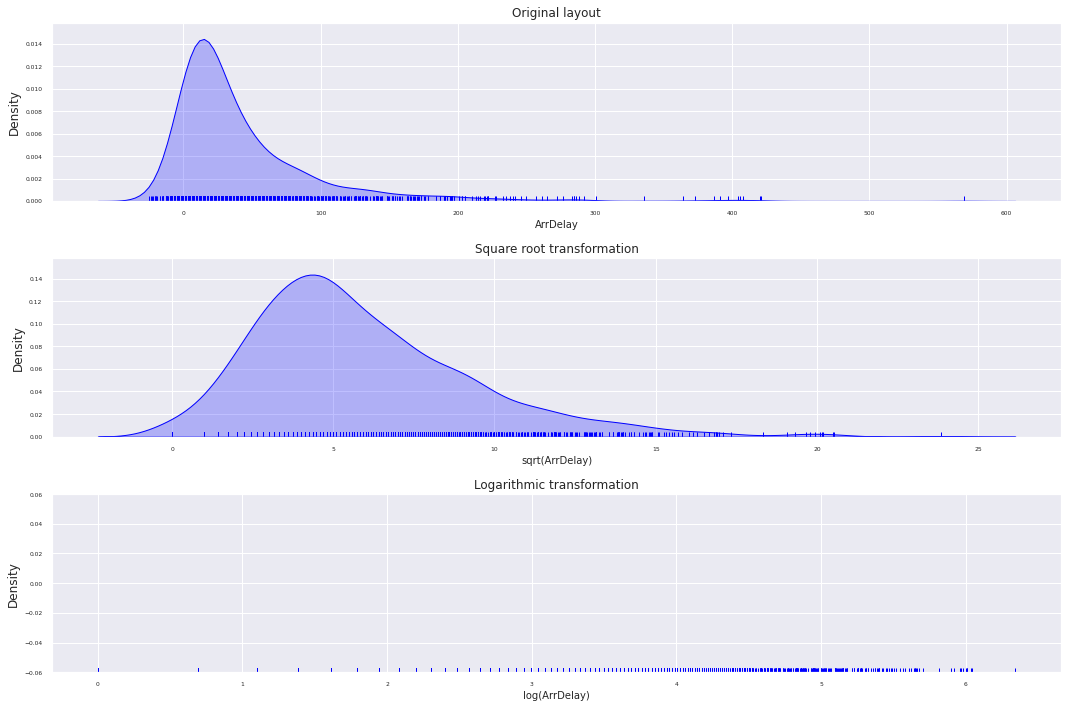

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png")

## Numerical variables

In [20]:
df.select_dtypes(include=['float64', 'int']).describe()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.937000e+03,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1931.000000,1937.000000,1931.000000,1937.000000,1931.000000,1931.000000,1937.000000,1937.000000,1931.000000,1936.000000,1937.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,3.383680e+06,6.188436,15.639649,3.979350,1525.729995,1472.326794,1619.844640,1642.601962,130.874676,132.051110,106.201968,42.473848,43.697470,749.701600,6.686173,18.018595,0.002581,18.381403,4.008668,15.340426,0.043341,24.799842
std,2.091878e+06,3.526773,8.625306,1.954701,446.757172,421.887079,549.546968,463.584889,70.309750,69.969208,67.079109,56.640112,53.677347,569.053389,4.469692,13.465994,0.050754,42.626851,20.647043,36.475965,0.923158,42.242719
min,1.682000e+03,1.000000,1.000000,1.000000,6.000000,10.000000,2.000000,1.000000,32.000000,30.000000,14.000000,-25.000000,6.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.491121e+06,3.000000,8.000000,2.000000,1216.000000,1145.000000,1334.000000,1345.000000,78.000000,80.000000,56.000000,9.000000,12.000000,334.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.304630e+06,6.000000,16.000000,4.000000,1550.000000,1511.000000,1730.000000,1715.000000,113.000000,115.000000,88.000000,24.000000,24.000000,594.000000,6.000000,14.000000,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000
75%,5.168977e+06,9.000000,23.000000,5.000000,1854.000000,1820.000000,2029.500000,2010.000000,161.000000,161.000000,134.000000,55.000000,53.000000,984.000000,8.000000,21.000000,0.000000,19.000000,0.000000,14.000000,0.000000,33.000000
max,7.008745e+06,12.000000,31.000000,7.000000,2356.000000,2359.000000,2359.000000,2359.000000,441.000000,419.000000,370.000000,569.000000,571.000000,3329.000000,44.000000,137.000000,1.000000,569.000000,285.000000,421.000000,25.000000,387.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

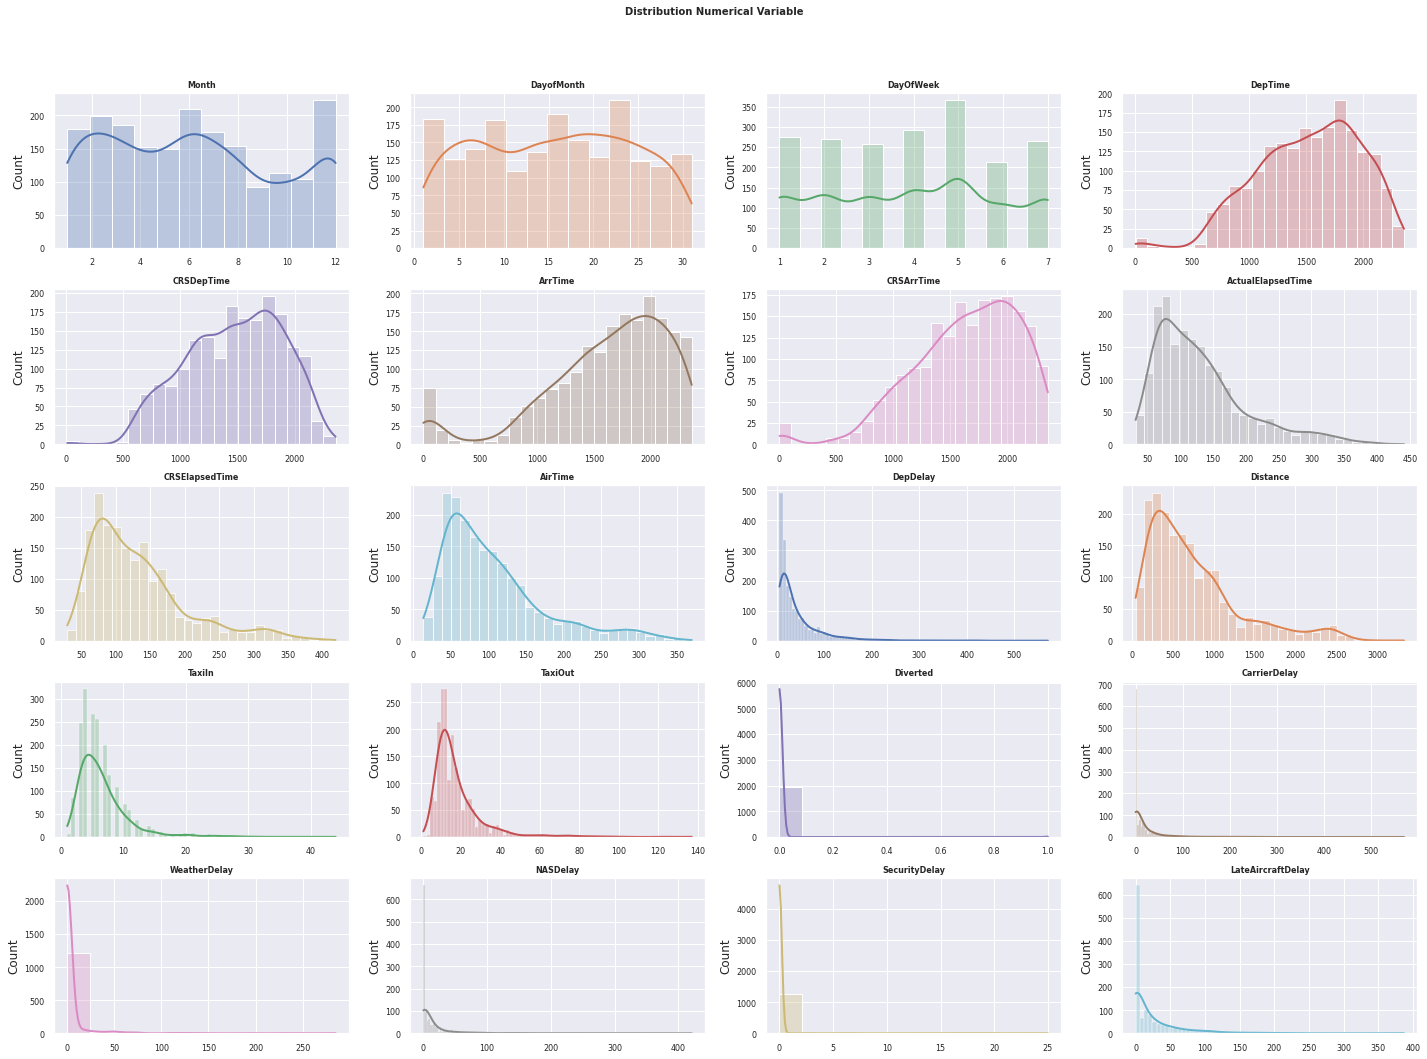

In [21]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop(['ID', 'ArrDelay'])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

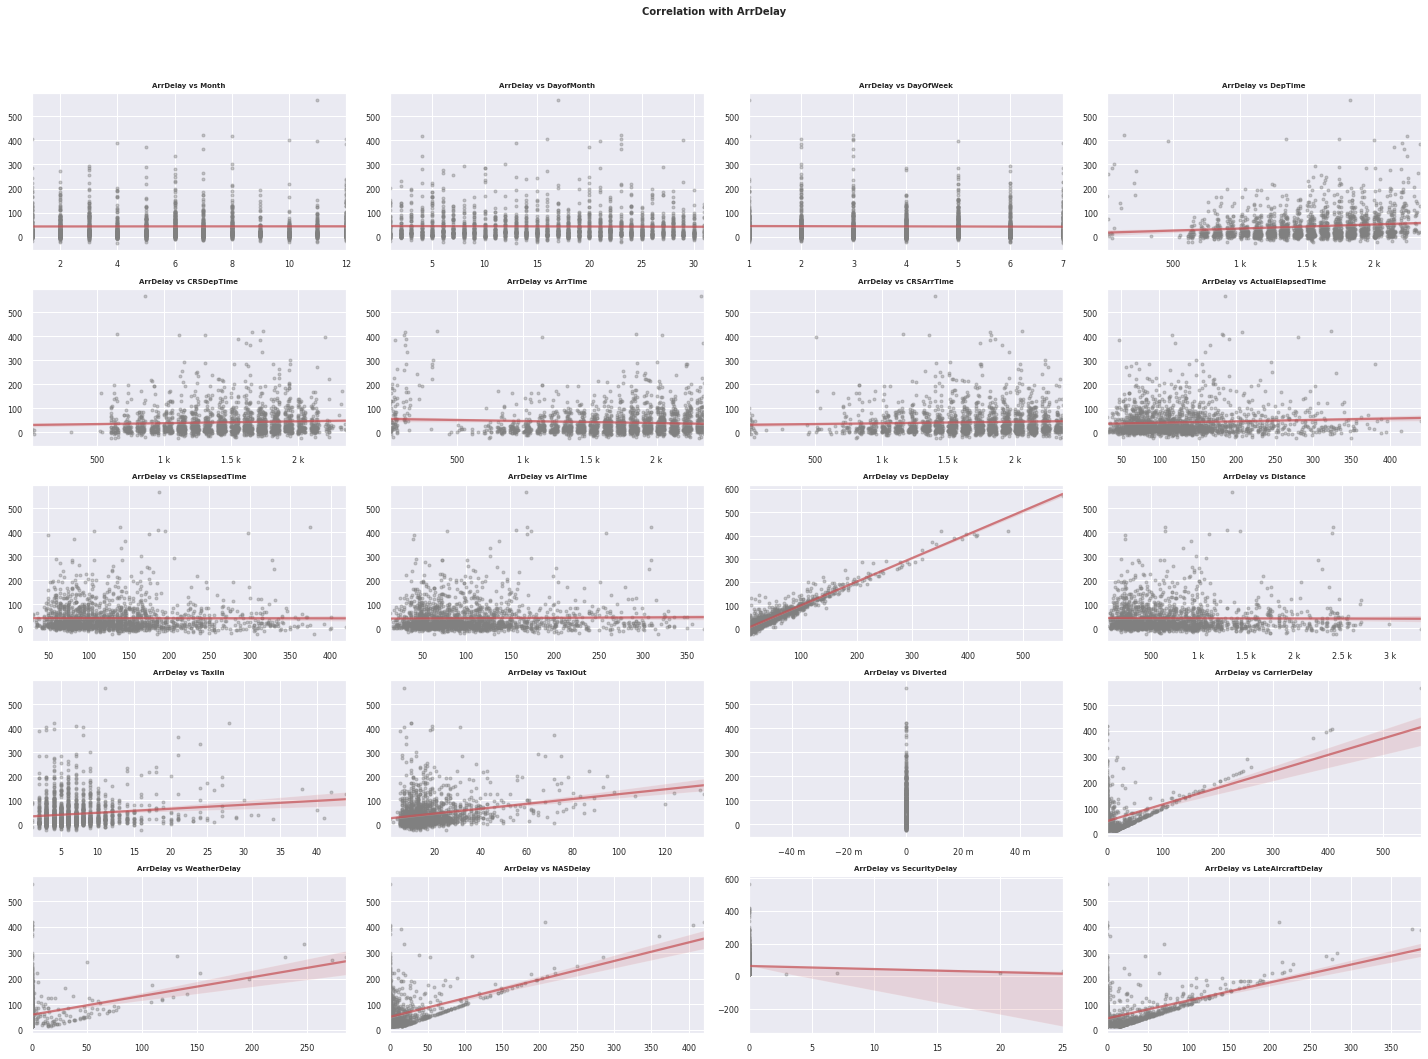

In [22]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop(['ID', 'ArrDelay'])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Empty axes are removed
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png")

### We can observe a strong correlation with DepDelay

## Numerical variables correlation

In [23]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

<IPython.core.display.Javascript object>

,variable_1,variable_2,r,abs_r
1,ID,Month,0.996163,0.996163
22,Month,ID,0.996163,0.996163
206,CRSElapsedTime,AirTime,0.986852,0.986852
227,AirTime,CRSElapsedTime,0.986852,0.986852
231,AirTime,Distance,0.981996,0.981996
292,Distance,AirTime,0.981996,0.981996
209,CRSElapsedTime,Distance,0.981914,0.981914
291,Distance,CRSElapsedTime,0.981914,0.981914
185,ActualElapsedTime,AirTime,0.978930,0.978930
226,AirTime,ActualElapsedTime,0.978930,0.978930


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

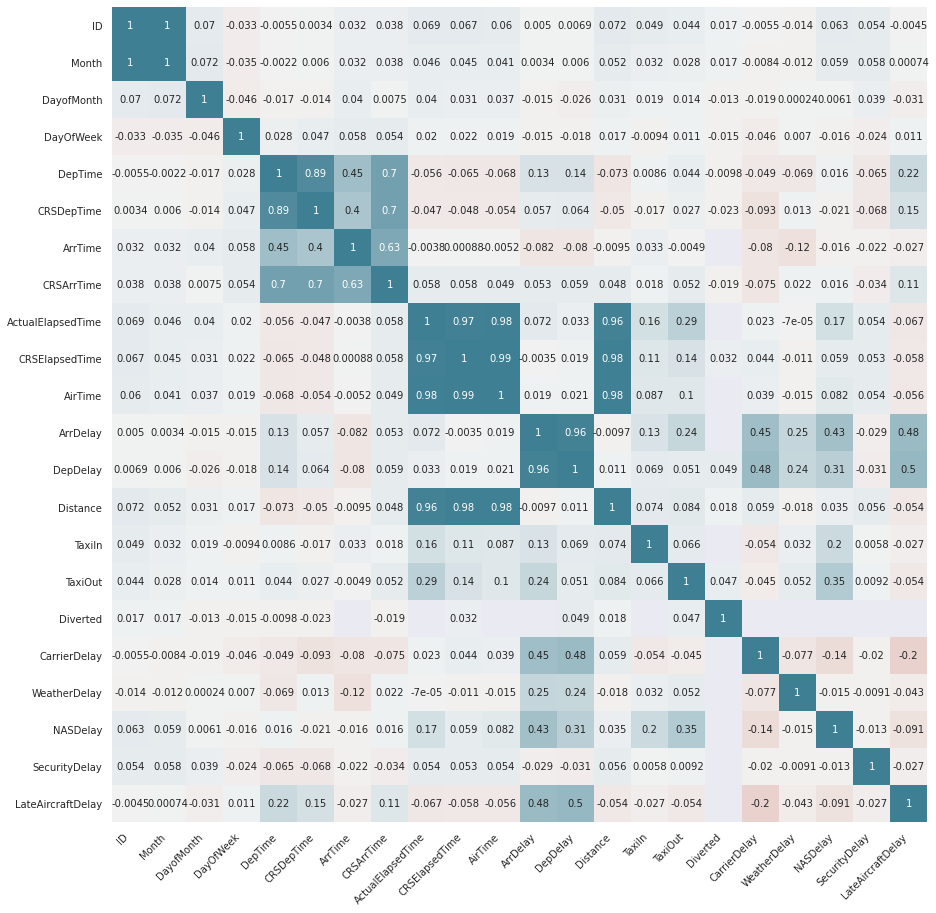

In [24]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png")

## Qualitative variables

In [25]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

,UniqueCarrier,TailNum,Origin,Dest
count,1937,1937,1937,1937
unique,20,1559,180,186
top,WN,N776WN,ATL,ATL
freq,388,6,130,102


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

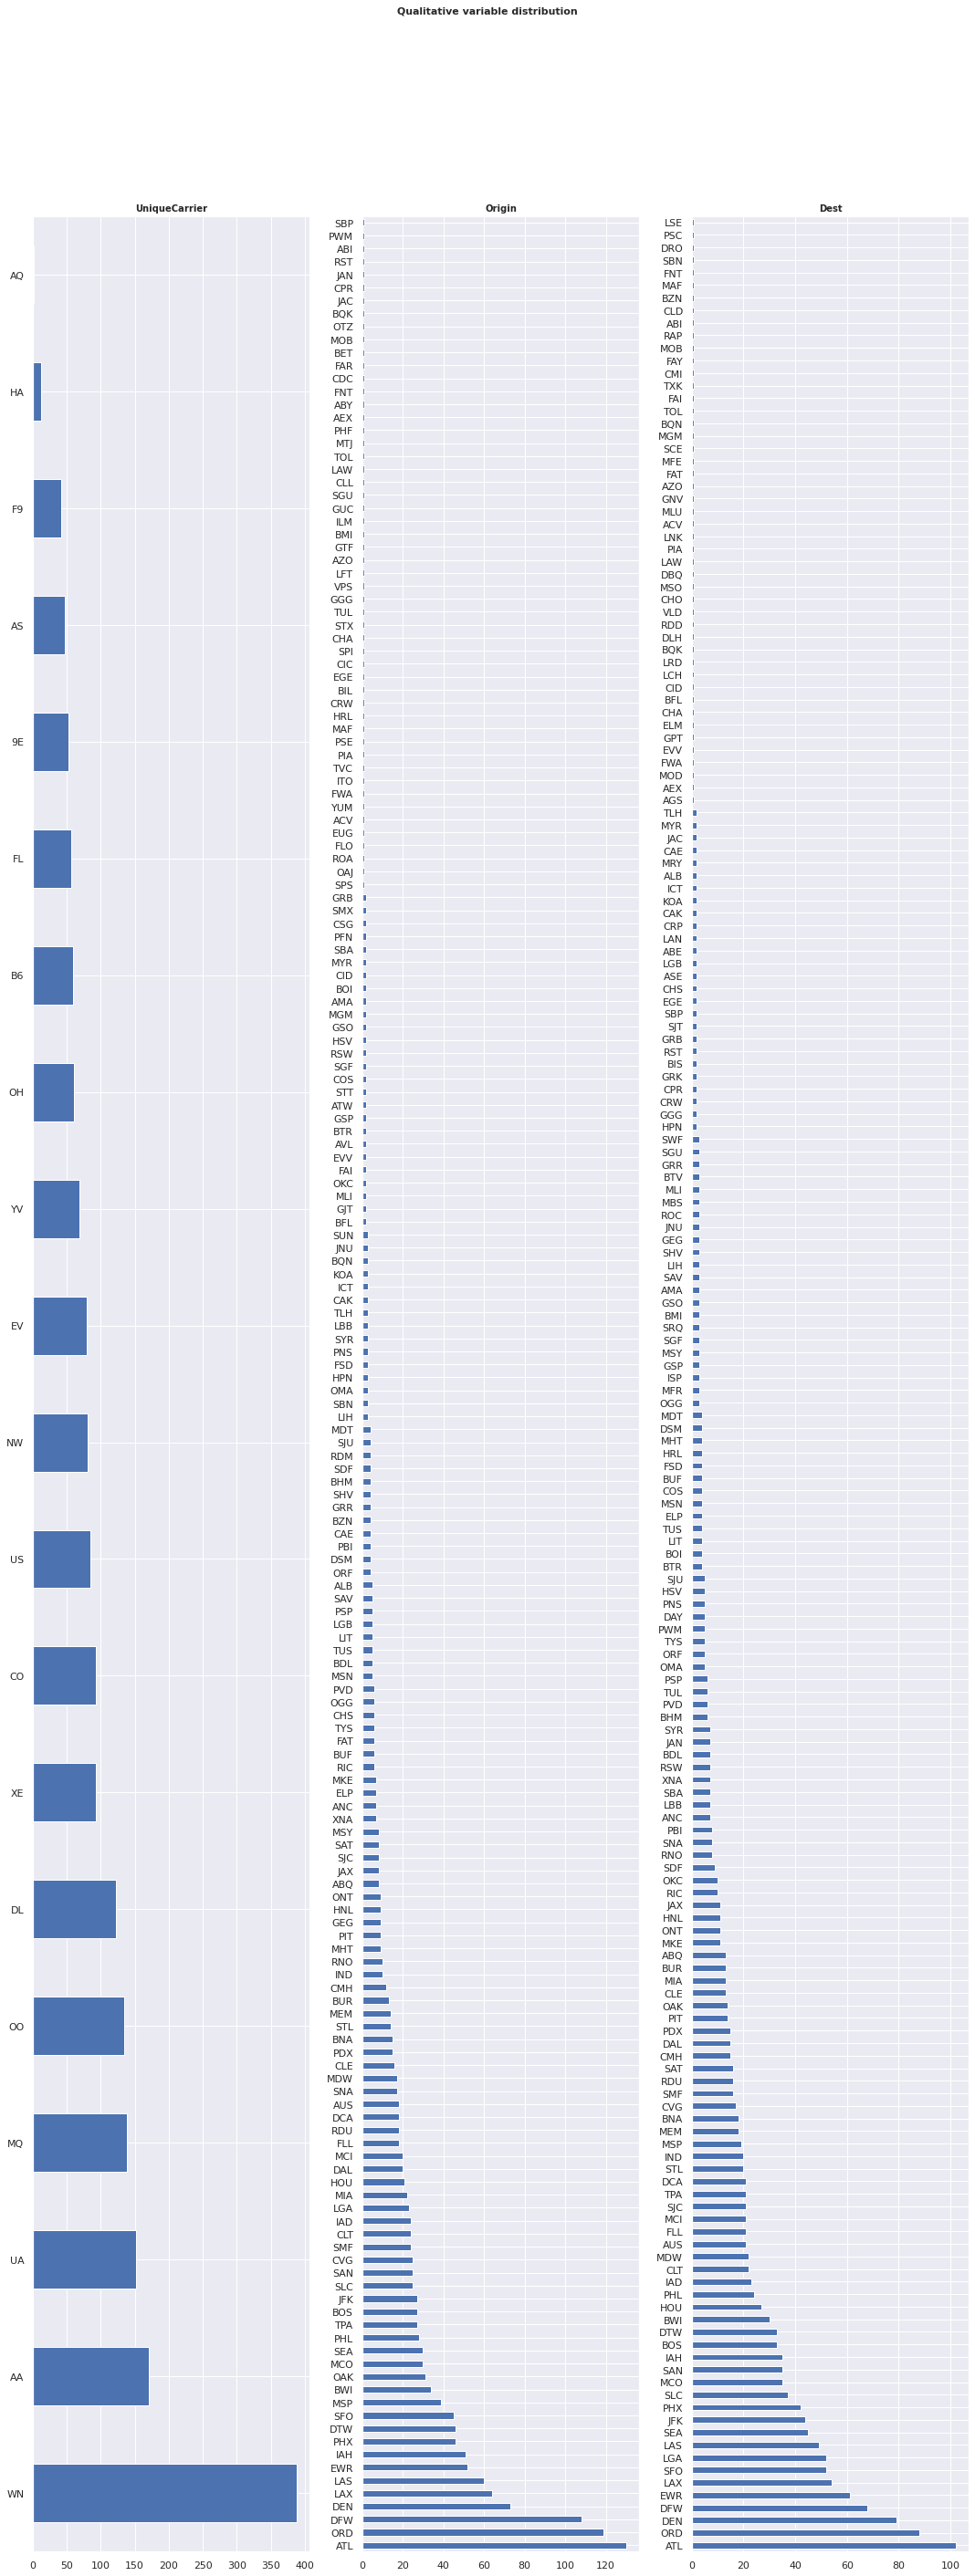

In [26]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop(['TailNum'])

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 11, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

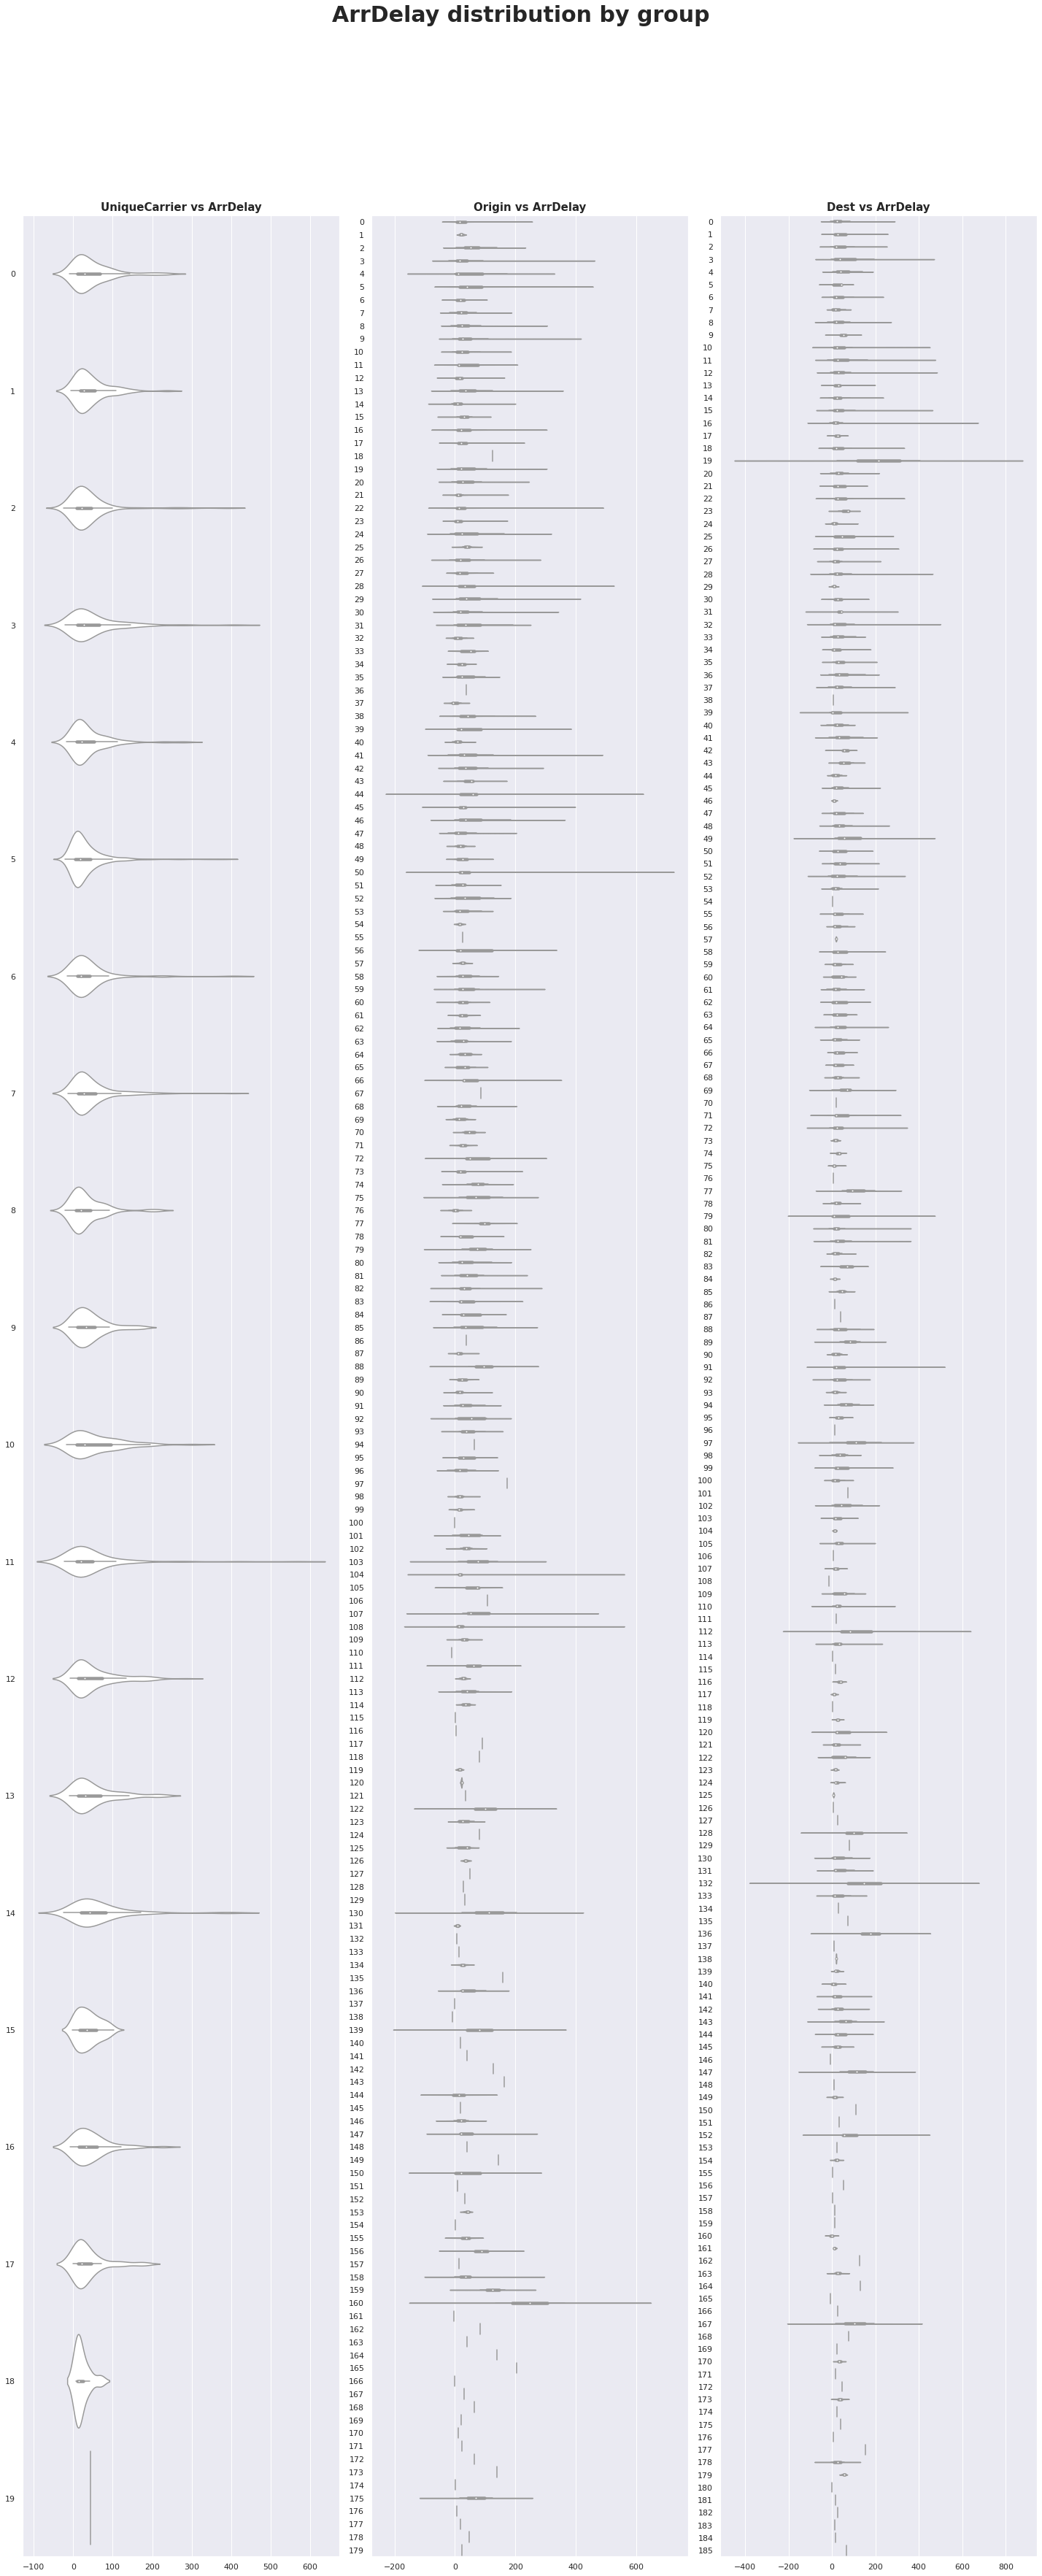

In [27]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 50))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop(['TailNum'])

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = 'ArrDelay',
        y     = colum,
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs ArrDelay", fontsize = 15, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/ArrDelay_vs_Qualitative_Variable.png")

## Remove duplicates

In [28]:
df.drop_duplicates(inplace=True)

## Transform Categorical Variables

In [29]:
# Frecuency encoding

geo = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest']

for category in geo: 
    
    cat_map = df.groupby(category).size() / len(df)*100
    
    df[categoria] = df[category].map(cat_map)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   float64
 9   TailNum            1937 non-null   float64
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   float64
 16  Dest              

## Imputation of missing values

In [31]:
df.isnull().sum().sum()

3371

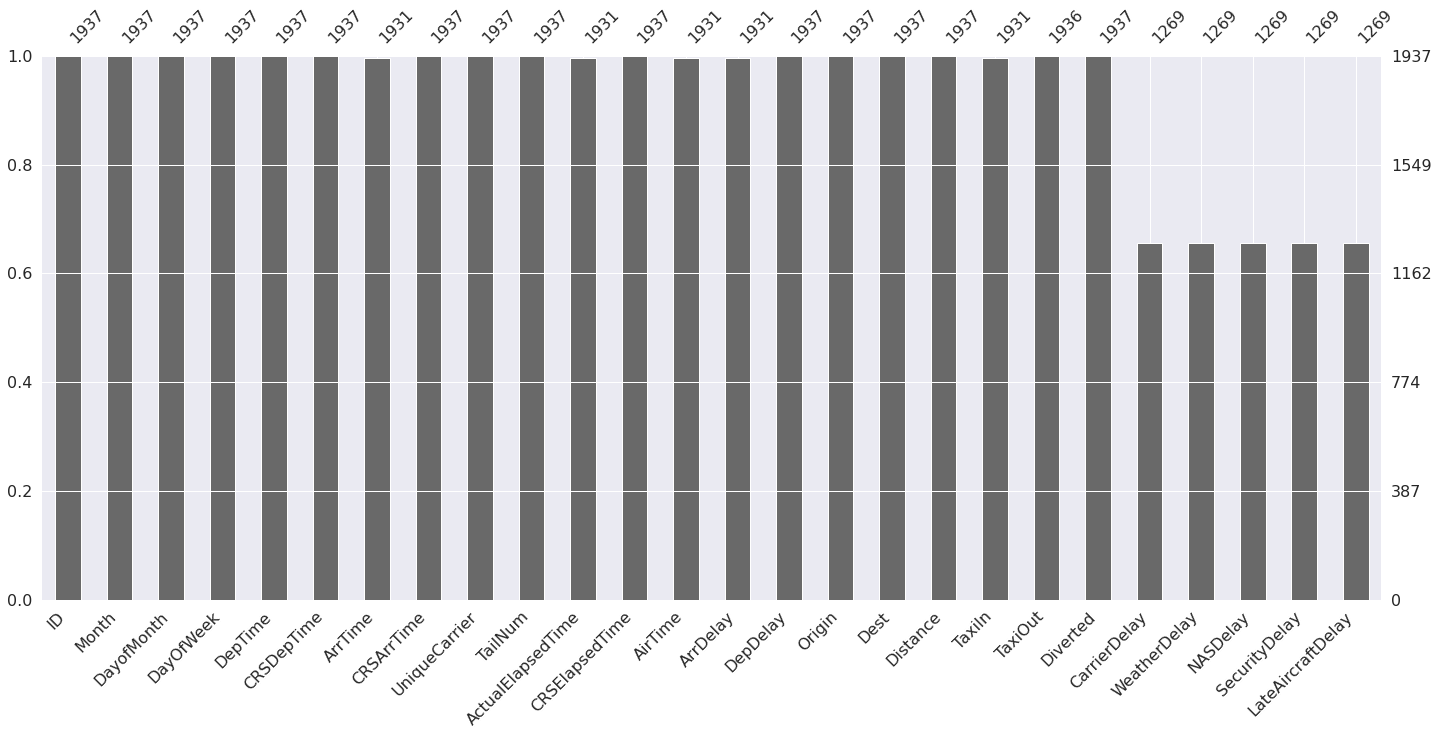

In [32]:
# Missing Values
msno.bar(df);

In [33]:
# Script created for transform missing data
# ===============================================================================
import missing

In [34]:

df[:] = missing.transform(df[:])

In [35]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
df.isna().any()

ID                   False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
TailNum              False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
Diverted             False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [37]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************
*****************************************************************************

# PCA

In [38]:

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

<IPython.core.display.Javascript object>

array([[-1.47153643, -1.69772865, -1.01287157, ..., -0.51979943,
        -0.058027  ,  1.6443371 ],
       [-0.9042994 ,  0.50566055,  0.01056726, ...,  0.09011779,
        -0.058027  , -0.7256083 ],
       [-0.33706237, -1.23385724, -1.52459098, ...,  0.15788637,
        -0.058027  , -0.7256083 ],
       ...,
       [-1.47153643,  0.27372484,  0.52228667, ..., -0.01153508,
        -0.058027  , -0.7256083 ],
       [-1.47153643, -0.76998583, -0.50115216, ..., -0.51979943,
        -0.058027  ,  0.35695935],
       [-0.62068089, -0.42208227,  1.03400608, ..., -0.11318795,
        -0.058027  ,  0.73732096]])

In [39]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

<IPython.core.display.Javascript object>

In [40]:
print(pca.explained_variance_ratio_)

[0.50824542 0.27345885 0.14723214]


## Plot the variations for each PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

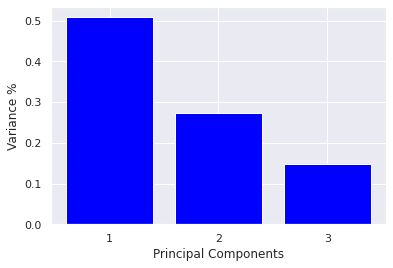

In [41]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);

## Create a dataframe of the components

In [42]:
PCA_components = pd.DataFrame(data= principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
PCA_components.head()

<IPython.core.display.Javascript object>

,principal component 1,principal component 2,principal component 3
0,466.419289,-415.399646,-39.356893
1,-523.522600,-404.861482,-74.536857
2,1459.539018,1370.667237,-181.584072
3,-202.848225,-518.079918,-40.025446
4,-420.034300,1704.779232,-524.782081


# Clustering with K-Means

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

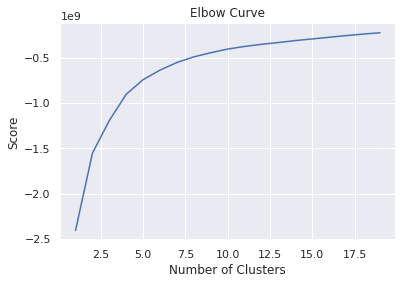

In [43]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

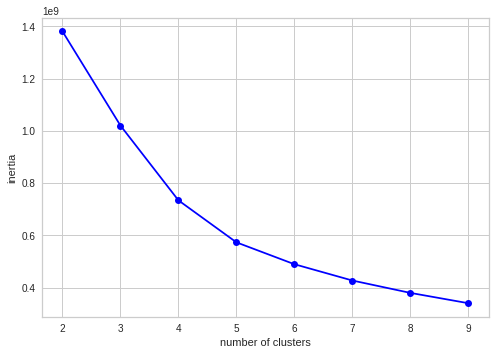

In [73]:
# Finding the optimal number of clusters

ks= range (2,10)
inertias= []

for k in ks:
    model= KMeans(n_clusters=k)
    model.fit(PCA_components)
    inertias.append(model.inertia_)
    
    
plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Execute the Kmeans model with 4 clusters and adjust it to the components of the pca

In [45]:
k_means_pca = KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42).fit(PCA_components)

<IPython.core.display.Javascript object>

## Verify the labels of the clustering

In [46]:
labels_pca = k_means_pca.labels_
labels_pca
clusters_pca = pd.concat([PCA_components, pd.DataFrame({'pca_clusters':labels_pca})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create the graph of the two main components

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

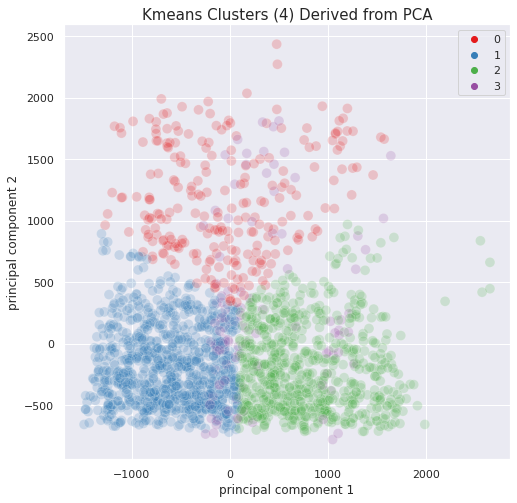

In [47]:
plt.figure(figsize=(8,8))

sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette='Set1', s=100,
               alpha=0.2).set_title('Kmeans Clusters (4) Derived from PCA',
                                   fontsize=15)

plt.legend()
plt.show()

## Insert the Components in the Dataframe

In [48]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), 
                          PCA_components], axis=1)

df_pca_kmeans.head()

<IPython.core.display.Javascript object>

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3
0,101064.0,1.0,1.0,2.0,1402.0,1230.0,1417.0,1256.0,4.801239,0.051626,75.0,86.0,56.0,81.0,92.0,2.374806,2.787816,370.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,81.0,466.419289,-415.399646,-39.356893
1,1507815.0,3.0,20.0,4.0,1723.0,1715.0,1932.0,1906.0,4.130098,0.051626,129.0,111.0,100.0,26.0,8.0,0.103252,5.265875,317.0,12.0,17.0,0.0,8.0,0.0,18.0,0.0,0.0,-523.522600,-404.861482,-74.536857
2,2980060.0,5.0,5.0,1.0,703.0,650.0,1031.0,1011.0,6.298400,0.051626,328.0,321.0,302.0,20.0,13.0,1.393908,1.910170,2105.0,8.0,18.0,0.0,0.0,0.0,20.0,0.0,0.0,1459.539018,1370.667237,-181.584072
3,6158470.0,11.0,8.0,6.0,1628.0,1559.0,1731.0,1715.0,7.847186,0.051626,63.0,76.0,42.0,16.0,29.0,3.097574,2.787816,236.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,16.0,-202.848225,-518.079918,-40.025446
4,5039080.0,9.0,26.0,5.0,1526.0,1230.0,2322.0,2029.0,7.847186,0.051626,296.0,299.0,280.0,173.0,176.0,0.154879,2.684564,2367.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,173.0,-420.034300,1704.779232,-524.782081


## Add the labels of the clustering.

In [49]:
df_pca_kmeans['Kmeans PCA'] = labels_pca
df_pca_kmeans.head()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA
0,101064.0,1.0,1.0,2.0,1402.0,1230.0,1417.0,1256.0,4.801239,0.051626,75.0,86.0,56.0,81.0,92.0,2.374806,2.787816,370.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,81.0,466.419289,-415.399646,-39.356893,2
1,1507815.0,3.0,20.0,4.0,1723.0,1715.0,1932.0,1906.0,4.130098,0.051626,129.0,111.0,100.0,26.0,8.0,0.103252,5.265875,317.0,12.0,17.0,0.0,8.0,0.0,18.0,0.0,0.0,-523.522600,-404.861482,-74.536857,1
2,2980060.0,5.0,5.0,1.0,703.0,650.0,1031.0,1011.0,6.298400,0.051626,328.0,321.0,302.0,20.0,13.0,1.393908,1.910170,2105.0,8.0,18.0,0.0,0.0,0.0,20.0,0.0,0.0,1459.539018,1370.667237,-181.584072,0
3,6158470.0,11.0,8.0,6.0,1628.0,1559.0,1731.0,1715.0,7.847186,0.051626,63.0,76.0,42.0,16.0,29.0,3.097574,2.787816,236.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,16.0,-202.848225,-518.079918,-40.025446,1
4,5039080.0,9.0,26.0,5.0,1526.0,1230.0,2322.0,2029.0,7.847186,0.051626,296.0,299.0,280.0,173.0,176.0,0.154879,2.684564,2367.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,173.0,-420.034300,1704.779232,-524.782081,0


## Check de Cllusters

In [50]:
df_cluster_0 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 0]
df_cluster_0.head()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA
2,2980060.0,5.0,5.0,1.0,703.0,650.0,1031.0,1011.0,6.298400,0.051626,328.0,321.0,302.0,20.0,13.0,1.393908,1.910170,2105.0,8.0,18.0,0.0,0.000000,0.000000,20.000000,0.000000,0.000000,1459.539018,1370.667237,-181.584072,0
4,5039080.0,9.0,26.0,5.0,1526.0,1230.0,2322.0,2029.0,7.847186,0.051626,296.0,299.0,280.0,173.0,176.0,0.154879,2.684564,2367.0,6.0,10.0,0.0,0.000000,0.000000,0.000000,0.000000,173.000000,-420.034300,1704.779232,-524.782081,0
16,6420900.0,11.0,20.0,4.0,1059.0,850.0,1906.0,1704.0,3.045947,0.051626,307.0,314.0,288.0,122.0,129.0,0.258131,2.271554,2465.0,9.0,10.0,0.0,19.000000,0.000000,0.000000,0.000000,103.000000,374.625062,1791.433458,-573.789779,0
23,4168982.0,7.0,10.0,4.0,1146.0,1135.0,2016.0,2006.0,3.045947,0.051626,330.0,331.0,301.0,10.0,11.0,0.671141,2.271554,2465.0,8.0,21.0,0.0,18.381403,4.008668,15.340426,0.043341,24.799842,-10.776522,1814.975104,-490.778856,0
33,6421333.0,11.0,21.0,5.0,1807.0,1759.0,2142.0,2139.0,3.045947,0.051626,395.0,400.0,350.0,3.0,8.0,1.393908,0.671141,2465.0,2.0,43.0,0.0,18.381403,4.008668,15.340426,0.043341,24.799842,-748.521990,1803.308366,-24.089018,0


In [51]:
df_cluster_0.describe()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA
count,2.420000e+02,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.0
mean,3.660706e+06,6.541322,16.785124,4.086777,1406.661157,1375.694215,1833.408449,1775.714876,8.062438,0.069119,261.218490,265.723140,234.633066,39.266421,42.537190,2.453739,2.089369,1856.446281,6.866472,19.780992,0.004132,22.498792,2.767722,16.450325,0.119604,20.300767,-47.041885,1152.541825,-178.451850,0.0
std,1.943949e+06,3.279565,8.363333,1.918655,375.042538,356.605745,350.201180,347.170324,5.480355,0.032620,57.473503,56.116892,54.078641,64.687307,64.359344,1.717879,1.131613,442.904445,3.557345,13.904743,0.064282,52.305572,7.121800,33.135552,1.606146,23.837678,627.883195,448.988953,227.493396,0.0
min,2.322700e+04,1.000000,1.000000,1.000000,58.000000,630.000000,356.000000,503.000000,0.051626,0.051626,130.874676,155.000000,106.201968,-23.000000,6.000000,0.103252,0.051626,1065.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1268.607255,335.216027,-650.503711,0.0
25%,2.093001e+06,4.000000,9.250000,3.000000,1205.500000,1130.250000,1635.750000,1605.250000,4.388229,0.051626,218.000000,224.000000,196.250000,8.000000,13.000000,1.239029,1.135777,1504.500000,4.250000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-559.742529,796.019226,-344.654420,0.0
50%,3.598970e+06,6.500000,17.000000,4.000000,1434.500000,1358.000000,1903.500000,1829.500000,6.298400,0.051626,253.000000,253.000000,224.000000,23.000000,22.000000,2.323180,2.168301,1750.500000,6.000000,15.000000,0.000000,18.381403,0.000000,15.340426,0.000000,24.799842,-98.999527,1062.842855,-182.041516,0.0
75%,5.352366e+06,9.000000,24.000000,6.000000,1711.750000,1645.000000,2112.500000,2035.000000,8.776458,0.103252,302.750000,310.000000,279.750000,49.000000,47.750000,3.097574,2.684564,2274.250000,8.000000,23.000000,0.000000,18.381403,4.008668,15.340426,0.043341,24.799842,347.290928,1573.874414,-13.901499,0.0
max,6.998338e+06,12.000000,31.000000,7.000000,2142.000000,2353.000000,2345.000000,2340.000000,20.030976,0.309757,441.000000,400.000000,370.000000,569.000000,571.000000,6.711409,5.265875,3329.000000,29.000000,107.000000,1.000000,569.000000,60.000000,421.000000,25.000000,173.000000,1572.098501,2434.695646,1418.606683,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

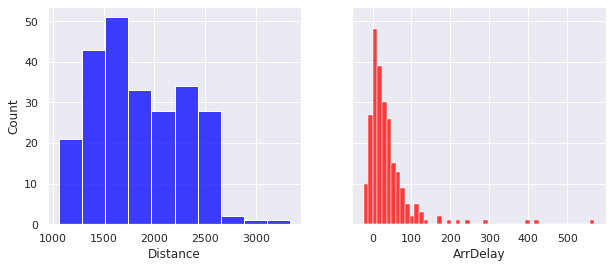

In [52]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="blue", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="red", ax=ax2, bins=50);

In [53]:
df_cluster_1 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 1]
df_cluster_1.head()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA
1,1507815.0,3.0,20.0,4.0,1723.0,1715.0,1932.0,1906.0,4.130098,0.051626,129.0,111.0,100.0,26.0,8.0,0.103252,5.265875,317.0,12.0,17.0,0.0,8.000000,0.000000,18.000000,0.000000,0.000000,-523.522600,-404.861482,-74.536857,1
3,6158470.0,11.0,8.0,6.0,1628.0,1559.0,1731.0,1715.0,7.847186,0.051626,63.0,76.0,42.0,16.0,29.0,3.097574,2.787816,236.0,7.0,14.0,0.0,0.000000,0.000000,0.000000,0.000000,16.000000,-202.848225,-518.079918,-40.025446,1
5,2799351.0,5.0,5.0,1.0,1547.0,1525.0,1800.0,1740.0,7.176045,0.051626,73.0,75.0,45.0,20.0,22.0,6.143521,0.774393,296.0,4.0,24.0,0.0,5.000000,0.000000,0.000000,0.000000,15.000000,-196.425186,-448.047828,-138.522152,1
6,6549953.0,12.0,30.0,2.0,1952.0,1940.0,2219.0,2235.0,20.030976,0.154879,87.0,115.0,75.0,-16.0,12.0,0.774393,0.258131,585.0,4.0,8.0,0.0,18.381403,4.008668,15.340426,0.043341,24.799842,-1053.443104,-128.192690,-73.550105,1
8,6939849.0,12.0,24.0,3.0,1845.0,1835.0,1941.0,1935.0,8.776458,0.051626,56.0,60.0,37.0,6.0,10.0,5.575632,1.084151,190.0,3.0,16.0,0.0,18.381403,4.008668,15.340426,0.043341,24.799842,-661.198870,-556.592374,14.709724,1


In [54]:
df_cluster_1.describe()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA
count,9.130000e+02,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.0
mean,3.409393e+06,6.256298,15.532311,4.094195,1816.447974,1742.937568,1995.058635,1922.731654,8.574816,0.077807,107.323794,108.205915,82.744366,43.277570,44.507119,2.315716,1.782434,547.111720,6.800721,17.812705,0.003286,15.330245,3.253622,16.120948,0.017290,27.259533,-617.334390,-186.452198,-54.469672,1.0
std,2.091658e+06,3.525289,8.681454,1.932495,211.296400,214.876100,212.270104,225.184503,6.302991,0.038614,42.814782,40.352521,38.013795,51.119587,47.817157,2.159061,1.530823,302.988848,5.108584,13.334305,0.057260,25.733056,11.432458,31.378665,0.100880,35.012975,406.686209,315.377478,77.594330,0.0
min,1.682000e+03,1.000000,1.000000,1.000000,1353.000000,1107.000000,1601.000000,5.000000,0.619515,0.051626,32.000000,32.000000,14.000000,-21.000000,6.000000,0.051626,0.051626,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1482.643033,-720.405069,-401.939012,1.0
25%,1.525965e+06,3.000000,8.000000,2.000000,1637.000000,1555.000000,1821.000000,1742.000000,4.130098,0.051626,73.000000,75.000000,52.000000,10.000000,13.000000,0.722767,0.567888,301.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-940.257198,-441.203080,-99.770596,1.0
50%,3.319302e+06,6.000000,15.000000,4.000000,1818.000000,1735.000000,2009.000000,1925.000000,6.917914,0.051626,103.000000,101.000000,76.000000,26.000000,27.000000,1.393908,1.187403,491.000000,5.000000,14.000000,0.000000,14.000000,0.000000,14.000000,0.000000,24.799842,-606.352476,-238.514374,-48.820376,1.0
75%,5.171859e+06,9.000000,23.000000,5.000000,2000.000000,1915.000000,2156.000000,2110.000000,8.776458,0.103252,135.000000,138.000000,109.000000,59.000000,58.000000,3.304078,2.684564,745.000000,8.000000,21.000000,0.000000,18.381403,4.008668,15.340426,0.043341,24.799842,-281.892041,26.602488,0.224542,1.0
max,7.007686e+06,12.000000,31.000000,7.000000,2308.000000,2253.000000,2359.000000,2357.000000,20.030976,0.309757,295.000000,255.000000,220.000000,406.000000,396.000000,6.711409,5.265875,1589.000000,44.000000,137.000000,1.000000,373.000000,132.000000,406.000000,3.000000,277.000000,87.493798,892.722633,320.304464,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

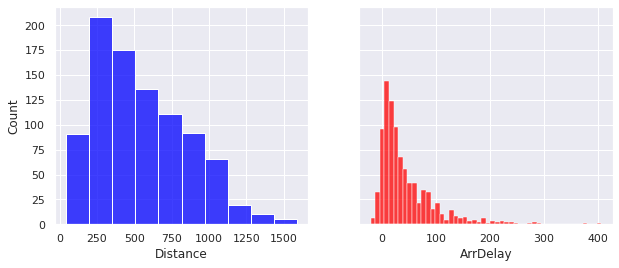

In [55]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_1, x="Distance",color="blue", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_1, x="ArrDelay",color="red", ax=ax2, bins=50);

In [56]:
df_cluster_2 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 2]
df_cluster_2.head()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA
0,101064.0,1.0,1.0,2.0,1402.0,1230.0,1417.0,1256.0,4.801239,0.051626,75.0,86.0,56.0,81.0,92.0,2.374806,2.787816,370.0,6.0,13.0,0.0,0.000000,0.000000,0.000000,0.000000,81.000000,466.419289,-415.399646,-39.356893,2
7,2214245.0,4.0,27.0,7.0,1221.0,1214.0,1457.0,1440.0,4.181724,0.206505,156.0,146.0,129.0,17.0,7.0,2.374806,1.806918,957.0,5.0,22.0,0.0,7.000000,0.000000,10.000000,0.000000,0.000000,464.212025,206.911859,-111.029530,2
15,2976078.0,5.0,1.0,4.0,1439.0,1429.0,1609.0,1540.0,6.298400,0.051626,90.0,71.0,42.0,29.0,10.0,1.187403,1.084151,214.0,3.0,45.0,0.0,10.000000,0.000000,19.000000,0.000000,0.000000,103.721285,-544.030292,-89.864041,2
17,2785746.0,5.0,25.0,7.0,848.0,840.0,1010.0,1005.0,7.176045,0.154879,82.0,85.0,58.0,5.0,8.0,0.103252,3.510583,364.0,12.0,12.0,0.0,18.381403,4.008668,15.340426,0.043341,24.799842,1261.276612,-422.248496,-142.709088,2
18,1747516.0,3.0,21.0,5.0,836.0,825.0,1029.0,1038.0,4.801239,0.103252,173.0,193.0,158.0,-9.0,11.0,0.826020,1.806918,1091.0,5.0,10.0,0.0,18.381403,4.008668,15.340426,0.043341,24.799842,1270.254513,324.742441,-116.858641,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

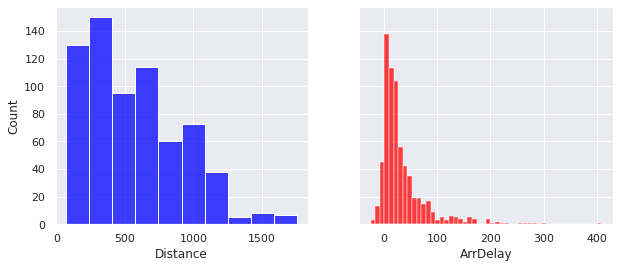

In [57]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_2, x="Distance",color="blue", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_2, x="ArrDelay",color="red", ax=ax2, bins=50);

In [58]:
df_cluster_3 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 3]
df_cluster_3.head()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA
34,6962945.0,12.0,17.0,3.0,2325.0,2115.0,721.0,539.0,3.045947,0.051626,296.0,324.0,271.0,102.0,130.0,1.600413,1.703665,2693.0,4.0,21.0,0.0,31.0,0.0,0.0,0.0,71.0,444.399255,1763.556776,1435.074937,3
40,6964828.0,12.0,20.0,6.0,2216.0,1855.0,55.0,2139.0,3.045947,0.051626,159.0,164.0,121.0,196.0,201.0,1.393908,2.271554,1005.0,27.0,11.0,0.0,8.0,0.0,0.0,0.0,188.0,83.552436,175.906302,1730.115279,3
57,5955102.0,11.0,7.0,5.0,2209.0,2125.0,25.0,2345.0,20.030976,0.154879,136.0,140.0,117.0,40.0,44.0,3.097574,0.774393,762.0,4.0,15.0,0.0,0.0,0.0,1.0,0.0,39.0,-131.421562,-58.664008,1853.147782,3
62,5487462.0,10.0,21.0,2.0,2230.0,2105.0,43.0,2352.0,4.801239,0.051626,193.0,227.0,171.0,51.0,85.0,2.684564,0.258131,1133.0,4.0,18.0,0.0,0.0,0.0,0.0,0.0,51.0,-133.938517,326.516465,1867.144219,3
76,1320996.0,3.0,20.0,4.0,2255.0,2220.0,30.0,2352.0,3.562210,0.051626,95.0,92.0,66.0,38.0,35.0,1.239029,0.206505,413.0,7.0,22.0,0.0,38.0,0.0,0.0,0.0,0.0,-213.795935,-418.553198,1886.216820,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

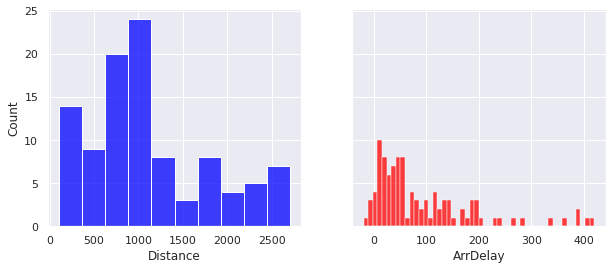

In [59]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_3, x="Distance",color="blue", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_3, x="ArrDelay",color="red", ax=ax2, bins=50);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

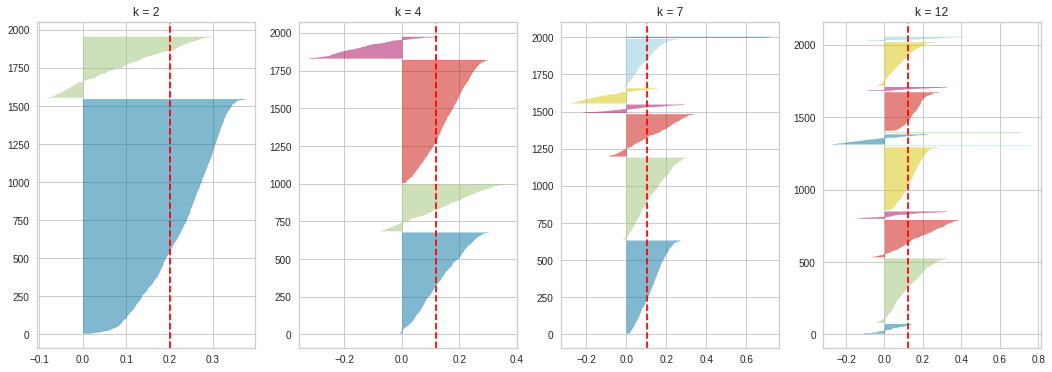

In [60]:
from yellowbrick.cluster import SilhouetteVisualizer

Scaler=StandardScaler()
X_transformed=Scaler.fit_transform(X)

fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(18,6),nrows=1,ncols=4)

#ax1
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2,random_state=6858), colors='yellowbrick',ax=ax1)
visualizer.fit(X_transformed)        # Fit the data to the visualizer
ax1.set_title('k = 2')               # Title

#ax2
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4,random_state=6858), colors='yellowbrick',ax=ax2)
visualizer.fit(X_transformed)        # Fit the data to the visualizer
ax2.set_title('k = 4')               # Title

#ax3
visualizer2 = SilhouetteVisualizer(KMeans(n_clusters=7,random_state=6858), colors='yellowbrick',ax=ax3)
visualizer2.fit(X_transformed)        # Fit the data to the visualizer
ax3.set_title('k = 7');               # Title

#ax4
visualizer2 = SilhouetteVisualizer(KMeans(n_clusters=12,random_state=6858), colors='yellowbrick',ax=ax4)
visualizer2.fit(X_transformed)        # Fit the data to the visualizer
ax4.set_title('k = 12');  

In [61]:
sil1 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 2, n_init = 12, random_state=42).fit(PCA_components)).labels_)
sil2 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42).fit(PCA_components)).labels_)
sil3 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 7, n_init = 12, random_state=42).fit(PCA_components)).labels_)
sil4 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 12, n_init = 12, random_state=42).fit(PCA_components)).labels_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
silhouette = pd.DataFrame({'Clusters': ['Scores'], 
                             '2 Clusters':[sil1],
                             '4 Clusters': [sil2],
                             '7 Clusters': [sil3],
                             '12 Clusters': [sil4],
                            })

<IPython.core.display.Javascript object>

In [63]:
silhouette

,Clusters,2 Clusters,4 Clusters,7 Clusters,12 Clusters
0,Scores,0.383237,0.452363,0.348595,0.34572


# Hierarchy

In [64]:
import scipy.cluster.hierarchy as sch

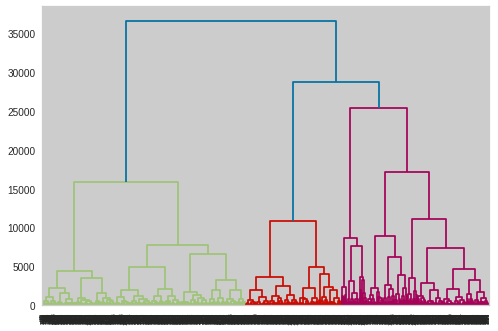

In [65]:
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='ward'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

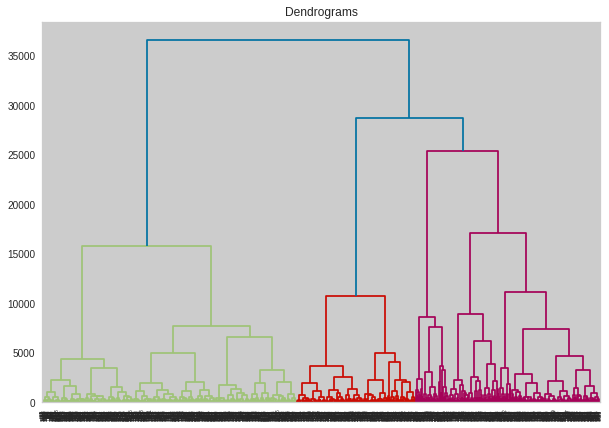

In [66]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(PCA_components, method='ward'))
plt.axhline(y=60000, color='r', linestyle='--')

In [67]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit(PCA_components)

AgglomerativeClustering(n_clusters=4)

In [68]:
labels_hier = cluster.labels_
labels_hier[:20]

array([2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2])

In [69]:
df_hier_pca = cluster.fit(PCA_components)

In [70]:
clusters_all_pca = pd.concat([df_pca_kmeans, pd.DataFrame({'pca_clusters_hier':labels_hier})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
clusters_all_pca.head()

,ID,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,principal component 1,principal component 2,principal component 3,Kmeans PCA,pca_clusters_hier
0,101064.0,1.0,1.0,2.0,1402.0,1230.0,1417.0,1256.0,4.801239,0.051626,75.0,86.0,56.0,81.0,92.0,2.374806,2.787816,370.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,81.0,466.419289,-415.399646,-39.356893,2,2
1,1507815.0,3.0,20.0,4.0,1723.0,1715.0,1932.0,1906.0,4.130098,0.051626,129.0,111.0,100.0,26.0,8.0,0.103252,5.265875,317.0,12.0,17.0,0.0,8.0,0.0,18.0,0.0,0.0,-523.522600,-404.861482,-74.536857,1,1
2,2980060.0,5.0,5.0,1.0,703.0,650.0,1031.0,1011.0,6.298400,0.051626,328.0,321.0,302.0,20.0,13.0,1.393908,1.910170,2105.0,8.0,18.0,0.0,0.0,0.0,20.0,0.0,0.0,1459.539018,1370.667237,-181.584072,0,0
3,6158470.0,11.0,8.0,6.0,1628.0,1559.0,1731.0,1715.0,7.847186,0.051626,63.0,76.0,42.0,16.0,29.0,3.097574,2.787816,236.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,16.0,-202.848225,-518.079918,-40.025446,1,1
4,5039080.0,9.0,26.0,5.0,1526.0,1230.0,2322.0,2029.0,7.847186,0.051626,296.0,299.0,280.0,173.0,176.0,0.154879,2.684564,2367.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,173.0,-420.034300,1704.779232,-524.782081,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

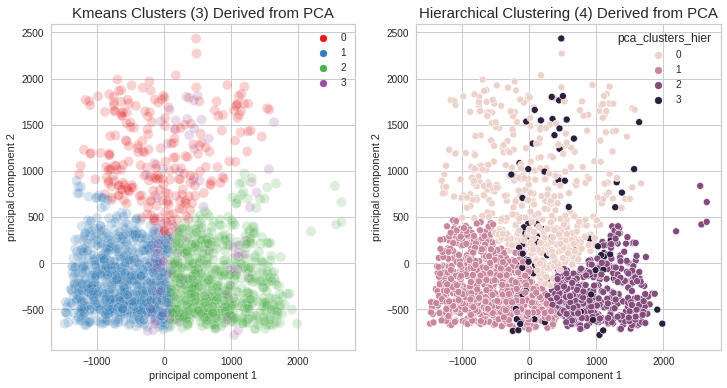

In [72]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette='Set1', s=100,
               alpha=0.2).set_title('Kmeans Clusters (3) Derived from PCA',
                                   fontsize=15)



plt.subplot(1,2,2)
sns.scatterplot(x='principal component 1',y='principal component 2',
                data=clusters_all_pca,hue='pca_clusters_hier').set_title('Hierarchical Clustering (4) Derived from PCA',
                                   fontsize=15);